# Project 1 - Exploring Weather Trends

## Get the data

To get the data first I had to see the name of the countrys available in the dataset, I also included as a curiosity a COUNT to see the number of cities for each country.

In the next picture you can see the query used to get the list of the cities.

![SQL to get the list of the countries and number of cities for each country](img/countries.png)

Once I have checked that the country "Netherlands" exist and it has minimum one city then I can get the data from that city.

Then I do another query to get the data from the city where the country is "Netherlands" by doing a INNER JOIN with the tables "city_list" and "city_data". Once I have this join I do a UNION to also add the global data from the table "global_data". Finally I order by year and city.

In the next image you can see the query created to do this.

![SQL to get the temperature for Amsterdam and the Global temperature](img/year_temperature.png)

Once I have tested that the query works I dowload the data in a CSV and then I import this data as a pandas dataframe.

In [1]:
import pandas as pd

#Read the csv file as a pandas dataframe
weather_data_original = pd.read_csv('weather_data.csv')

Once we have read the data and stored in a pandas dataframe we can then start the first plot to see the difference between Amsterdam and the global average temperature.

First we will check the data by looking the head of the dataframe.

In [2]:
weather_data_original.head

<bound method NDFrame.head of      year       city  avg_temp
0    1743  Amsterdam      7.43
1    1744  Amsterdam     10.31
2    1745  Amsterdam      3.06
3    1746  Amsterdam       NaN
4    1747  Amsterdam       NaN
5    1748  Amsterdam       NaN
6    1749  Amsterdam       NaN
7    1750  Amsterdam     10.04
8    1750     Global      8.72
9    1751  Amsterdam      9.63
10   1751     Global      7.98
11   1752  Amsterdam      5.97
12   1752     Global      5.78
13   1753  Amsterdam      9.08
14   1753     Global      8.39
15   1754  Amsterdam      8.72
16   1754     Global      8.47
17   1755  Amsterdam      8.55
18   1755     Global      8.36
19   1756  Amsterdam      9.17
20   1756     Global      8.85
21   1757  Amsterdam      9.05
22   1757     Global      9.02
23   1758  Amsterdam      8.79
24   1758     Global      6.74
25   1759  Amsterdam      9.64
26   1759     Global      7.99
27   1760  Amsterdam      9.14
28   1760     Global      7.19
29   1761  Amsterdam      9.41
..    ...

As we can see there is only one column called "city" and the data in in long format, meaning that we have the data from 'Amsterdam' and 'Global' in long format. In this case, I will do a pivot to put the data from each city in individual columns.

In [3]:
#Pivot the dataframe by year
weather_data = weather_data_original.pivot(index = 'year', columns='city', values='avg_temp')
weather_data.head

<bound method NDFrame.head of city  Amsterdam  Global
year                   
1743       7.43     NaN
1744      10.31     NaN
1745       3.06     NaN
1746        NaN     NaN
1747        NaN     NaN
1748        NaN     NaN
1749        NaN     NaN
1750      10.04    8.72
1751       9.63    7.98
1752       5.97    5.78
1753       9.08    8.39
1754       8.72    8.47
1755       8.55    8.36
1756       9.17    8.85
1757       9.05    9.02
1758       8.79    6.74
1759       9.64    7.99
1760       9.14    7.19
1761       9.41    8.77
1762       8.58    8.61
1763       8.44    7.50
1764       9.07    8.40
1765       8.87    8.25
1766       8.85    8.41
1767       8.50    8.22
1768       8.61    6.78
1769       8.81    7.69
1770       8.84    7.69
1771       8.22    7.85
1772       9.30    8.19
...         ...     ...
1986       8.79    8.83
1987       8.66    8.99
1988      10.21    9.20
1989      10.57    8.92
1990      10.63    9.23
1991       9.32    9.18
1992      10.39    8.84
1993      

## Analyze the data

Once we have the data of each city in a column we can do the first plot using the matlplotlib library.

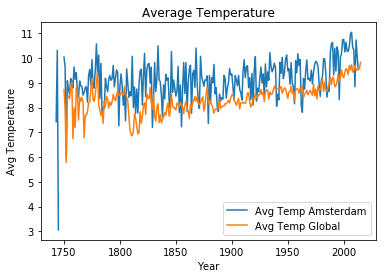

In [7]:
import matplotlib.pyplot as plt

plt.plot(weather_data.index, weather_data.Amsterdam, label="Avg Temp Amsterdam")
plt.plot(weather_data.index, weather_data.Global, label="Avg Temp Global")

plt.xlabel("Year")
plt.ylabel("Avg Temperature")
plt.title("Average Temperature")
plt.legend()
plt.show()

But in the previous plot the data doesn't look really nice, so I will apply a SMA (Simple Moving Average) of 10 years to see if the line chart gets more smooth.

In [5]:
#Calculate the moving average with a window size of 10
weather_data['Amsterdam_10'] = weather_data.Amsterdam.rolling(window=10).mean()
weather_data['Global_10'] = weather_data.Global.rolling(window=10).mean()

Once I have the moving average for each city I will create again the line chart.

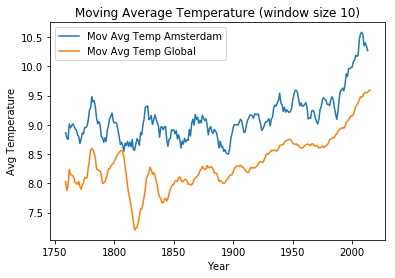

In [6]:
plt.plot(weather_data.index, weather_data.Amsterdam_10, label="Mov Avg Temp Amsterdam")
plt.plot(weather_data.index, weather_data.Global_10, label="Mov Avg Temp Global")

plt.xlabel("Year")
plt.ylabel("Avg Temperature")
plt.title("Moving Average Temperature (window size 10)")
plt.legend()
plt.show()

Here are the 4 observations I do from the prevoius plot:
  - The global average temperature is lower compered to the average temperature of Amsterdam during the last years. 
  - In general the trend  is increasing in both cases, specially since 1900.
  - Around 1820 the global temperature decreased considerably and that decrease is not reflected really a lot in the average temperature of Amsterdam.
  - Since 1900 the variation of the average temperature of Amsterdam is lower compered to the global average temperature.